In [128]:
from fredapi import Fred
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime as dt
import matplotlib.pyplot as plt
from hurst import compute_Hc, random_walk
fred = Fred(api_key='8331616a9ca26463e8d7d88b13cc5a99')
data = fred.get_series('SP500')

In [129]:
df1 = pd.read_csv('/Users/liliaromanova/Downloads/GOLDPMGBD228NLBM.csv')
df2 = pd.read_csv('/Users/liliaromanova/Downloads/M2SL.csv')
df3 = pd.read_csv('/Users/liliaromanova/Downloads/DGS10.csv')
df5 = pd.read_csv('/Users/liliaromanova/Downloads/SLVPRUSD.csv')
df9 = pd.read_csv('/Users/liliaromanova/Downloads/CPIAUCSL.csv')

In [130]:
df1 = pd.DataFrame(df1)
df2 = pd.DataFrame(df2)
df = pd.DataFrame()
df = df1.merge(df2)

In [131]:
df['Gold'] = df['GOLDPMGBD228NLBM']
df['M2'] = df['M2SL']

In [132]:
for i in range(len(df['Gold'])):
    if df['Gold'][i]== '.':
        df['Gold'][i] = np.nan

<ipython-input-132-26997bc7afd7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gold'][i] = np.nan


In [133]:
df['Gold']

0       37.700
1       39.200
2       40.800
3       38.900
4       39.450
        ...   
451    1862.95
452    1734.15
453    1726.05
454    1899.35
455    1781.50
Name: Gold, Length: 456, dtype: object

In [134]:
df['Gold'] = df['Gold'].astype(float)

In [135]:
df['Gold'] = df['Gold']/df['Gold'][0]
df['M2'] = df['M2']/df['M2'][0]

In [136]:
df = df.dropna()

<AxesSubplot:xlabel='DATE'>

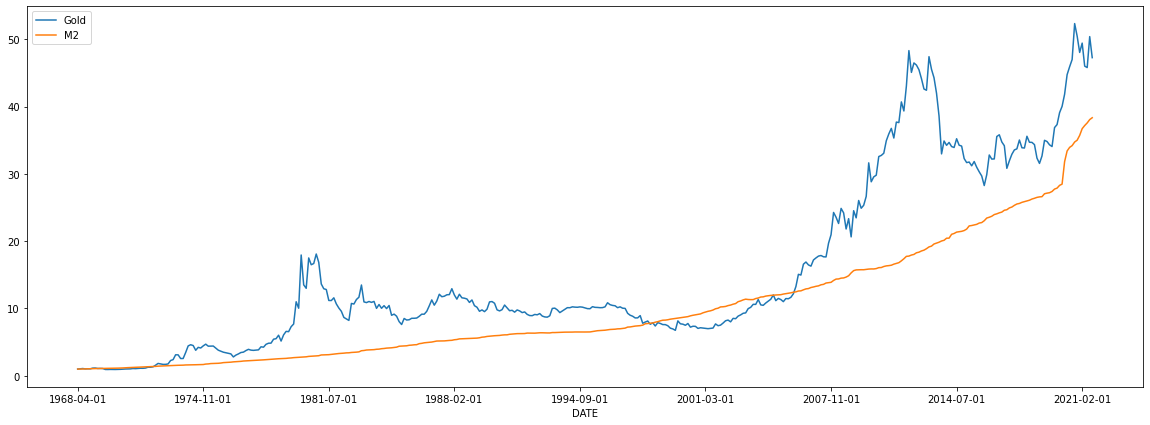

In [137]:
df.plot(x="DATE", y=["Gold", "M2"], figsize=(20,7))

In [138]:
cov_matrix = df.cov()
cov_matrix

,M2SL,Gold,M2
M2SL,2.120406e+07,54331.845533,39581.965771
Gold,5.433185e+04,168.154927,101.422150
M2,3.958197e+04,101.422150,73.888306


In [139]:
corr_matrix = df.corr()
corr_matrix

,M2SL,Gold,M2
M2SL,1.000000,0.909893,1.000000
Gold,0.909893,1.000000,0.909893
M2,1.000000,0.909893,1.000000


<AxesSubplot:>

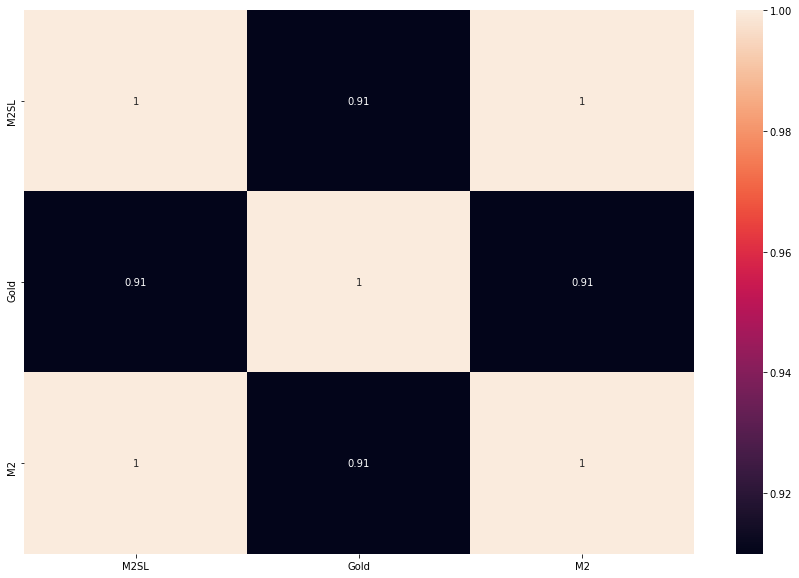

In [140]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)

In [141]:
df4 = df1.merge(df3)

In [142]:
df4['Gold'] = df4['GOLDPMGBD228NLBM']
df4['DGS10'] = df4['DGS10']

In [143]:
for j in range(len(df4['Gold'])):
    if df4['Gold'][j]== '.':
        df4['Gold'][j] = np.nan
for k in range(len(df4['DGS10'])):
    if df4['DGS10'][k]== '.':
        df4['DGS10'][k] = np.nan

In [144]:
df4['Gold'] = df4['Gold'].astype(float)
df4['DGS10'] = df4['DGS10'].astype(float)
df4['Gold'] = df4['Gold']/df4['Gold'][0]
df4 = df4.dropna()

<AxesSubplot:xlabel='DATE'>

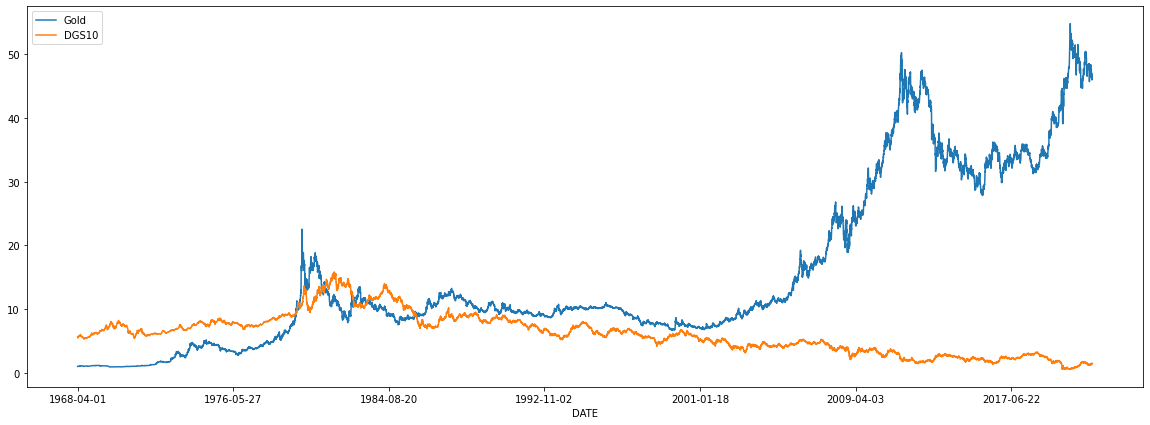

In [145]:
df4.plot(x="DATE", y=["Gold", "DGS10"], figsize=(20,7))

<AxesSubplot:>

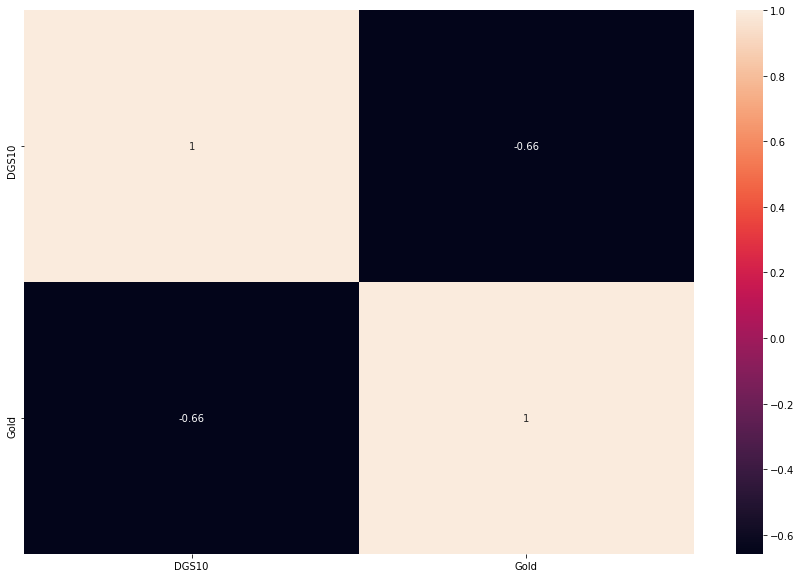

In [146]:
plt.figure(figsize=(15, 10))
sns.heatmap(df4.corr(), annot=True)

In [147]:
df6 = df1.merge(df5)

In [148]:
df6

,DATE,GOLDPMGBD228NLBM,SLVPRUSD
0,2017-10-02,1273.70,16.580
1,2017-10-03,1271.25,16.610
2,2017-10-04,1274.25,16.825
3,2017-10-05,1274.50,16.660
4,2017-10-06,1261.80,16.625
...,...,...,...
1041,2021-09-28,1733.75,22.200
1042,2021-09-29,1737.15,22.325
1043,2021-09-30,1742.80,21.525
1044,2021-10-01,1757.05,22.095


In [149]:
for l in range(len(df6['GOLDPMGBD228NLBM'])):
    if df6['GOLDPMGBD228NLBM'][l]== '.':
        df6['GOLDPMGBD228NLBM'][l] = np.nan
for m in range(len(df6['SLVPRUSD'])):
    if df6['SLVPRUSD'][m]== '.':
        df6['SLVPRUSD'][m] = np.nan

In [150]:
df6['GOLDPMGBD228NLBM'] = df6['GOLDPMGBD228NLBM'].astype(float)
df6['SLVPRUSD'] = df6['SLVPRUSD'].astype(float)

In [151]:
df6['Paritet'] = df6['GOLDPMGBD228NLBM']/df6['SLVPRUSD']
df6 = df6.dropna()

<AxesSubplot:xlabel='DATE'>

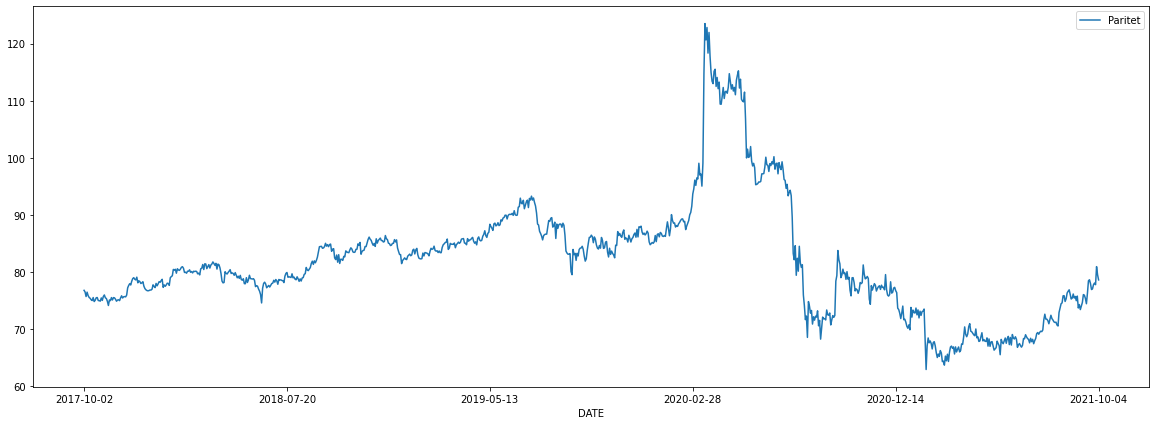

In [152]:
df6.plot(x="DATE", y=["Paritet"], figsize=(20,7))

In [153]:
df6['Paritet']

0       76.821472
1       76.535220
2       75.735513
3       76.500600
4       75.897744
          ...    
1041    78.096847
1042    77.811870
1043    80.966318
1044    79.522516
1045    78.644106
Name: Paritet, Length: 1001, dtype: float64

In [154]:
df7 = pd.read_csv('/Users/liliaromanova/Downloads/MacroTrends_Data_Download.csv')

In [155]:
df7 = pd.DataFrame(df7)

In [156]:
df6['DATE'] = pd.to_datetime(df6['DATE'])
df7['date'] = pd.to_datetime(df7['date']).dt.strftime('%Y-%m')
df7.set_index('date', inplace=True)
df6.set_index('DATE', inplace=True)

<ipython-input-156-4d0f780c49db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['DATE'] = pd.to_datetime(df6['DATE'])


In [157]:
df1['date'] = pd.to_datetime(df1['DATE'])
df1.set_index('date', inplace=True)
df1 = df1.drop('DATE', axis=1)

for o in range(len(df1['GOLDPMGBD228NLBM'])):
    if df1['GOLDPMGBD228NLBM'][o]== '.':
        df1['GOLDPMGBD228NLBM'][o] = np.nan
df1['GOLDPMGBD228NLBM'] = df1['GOLDPMGBD228NLBM'].astype(float)
df1 = df1.asfreq('BM')

In [158]:
df1.index = pd.to_datetime(df1.index).strftime('%Y-%m')

In [159]:
df8 = pd.concat([df1, df7],axis=1)

In [160]:
df8 = df8.dropna()
df8

,GOLDPMGBD228NLBM,real,nominal
1968-04,39.10,18.65,2.345
1968-05,41.95,19.27,2.430
1968-06,40.90,19.72,2.501
1968-07,38.85,17.28,2.205
1968-08,39.80,17.73,2.268
...,...,...,...
2021-04,1767.65,26.49,25.869
2021-06,1763.15,26.37,26.188
2021-07,1825.75,25.60,25.547
2021-08,1814.85,24.00,23.997


In [161]:
df8['Paritet'] = df8['GOLDPMGBD228NLBM']/df8['real']

In [162]:
df8['Paritet'].mean()

33.603334789568436

In [163]:
df8['Paritet'].median()

36.2046511627907

<AxesSubplot:>

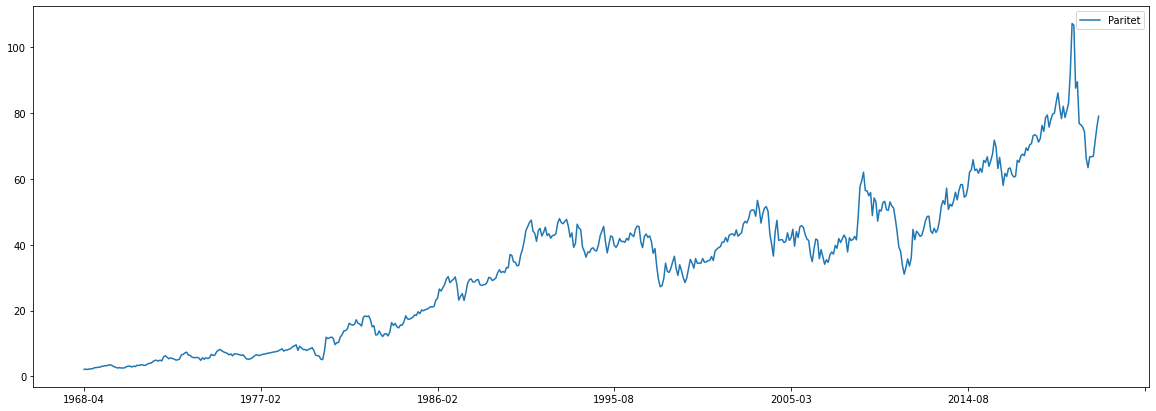

In [164]:
df8.plot(y=["Paritet"], figsize=(20,7))

In [165]:
data = pd.DataFrame(data)
data = data.reset_index()
data.columns = ['DATE', 'SP500']
data['date'] = pd.to_datetime(data['DATE'])
data.set_index('date', inplace=True)
data = data.drop('DATE', axis=1)

data['SP500'] = data['SP500'].astype(float)
data = data.asfreq('BM')

In [166]:
data.index = pd.to_datetime(data.index).strftime('%Y-%m')

In [167]:
df8 = pd.concat([df1, df7, data],axis=1)

In [168]:
df8.dropna()

,GOLDPMGBD228NLBM,real,nominal,SP500
2011-10,1722.00,41.50,34.355,1253.30
2011-11,1746.00,39.59,32.746,1246.96
2012-01,1744.00,40.15,33.265,1312.41
2012-02,1770.00,41.63,34.633,1365.68
2012-03,1662.50,38.75,32.485,1408.47
...,...,...,...,...
2021-04,1767.65,26.49,25.869,4181.17
2021-06,1763.15,26.37,26.188,4297.50
2021-07,1825.75,25.60,25.547,4395.26
2021-08,1814.85,24.00,23.997,4522.68


In [169]:
df2 = pd.read_csv('/Users/liliaromanova/Downloads/M2SL.csv')

In [170]:
df2['date'] = pd.to_datetime(df2['DATE'])
df2.set_index('date', inplace=True)
df2 = df2.drop('DATE', axis=1)

df2['M2SL'] = df2['M2SL'].astype(float)

In [171]:
df2.index = pd.to_datetime(df2.index).strftime('%Y-%m')

In [172]:
df8 = pd.concat([df1, df7, data, df2],axis=1)

In [173]:
df8 = df8.dropna()
df8

,GOLDPMGBD228NLBM,real,nominal,SP500,M2SL
2011-10,1722.00,41.50,34.355,1253.30,9559.5
2011-11,1746.00,39.59,32.746,1246.96,9610.1
2012-01,1744.00,40.15,33.265,1312.41,9731.5
2012-02,1770.00,41.63,34.633,1365.68,9789.3
2012-03,1662.50,38.75,32.485,1408.47,9837.1
...,...,...,...,...,...
2021-03,1691.05,25.34,24.532,3972.89,19913.5
2021-04,1767.65,26.49,25.869,4181.17,20122.7
2021-06,1763.15,26.37,26.188,4297.50,20387.4
2021-07,1825.75,25.60,25.547,4395.26,20534.3


<AxesSubplot:>

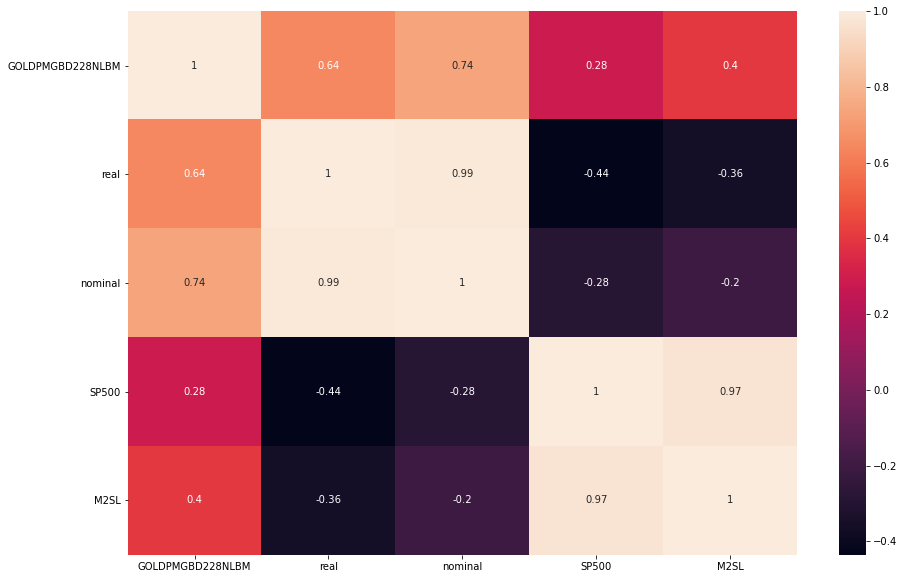

In [174]:
plt.figure(figsize=(15, 10))
sns.heatmap(df8.corr(), annot=True)

In [175]:
H, c, a = compute_Hc(df8['SP500'].dropna())
print("H={:.4f}, c={:.4f}".format(H,c))

H=0.7933, c=0.7416


In [176]:
np.log(df8)

,GOLDPMGBD228NLBM,real,nominal,SP500,M2SL
2011-10,7.451242,3.725693,3.536748,7.133535,9.165291
2011-11,7.465083,3.678577,3.488781,7.128464,9.170570
2012-01,7.463937,3.692622,3.504506,7.179620,9.183123
2012-02,7.478735,3.728821,3.544807,7.219408,9.189045
2012-03,7.416078,3.657131,3.480778,7.250259,9.193916
...,...,...,...,...,...
2021-03,7.433105,3.232384,3.199978,8.287249,9.899153
2021-04,7.477406,3.276767,3.253045,8.338346,9.909604
2021-06,7.474857,3.272227,3.265301,8.365789,9.922672
2021-07,7.509746,3.242592,3.240520,8.388282,9.929852


<AxesSubplot:>

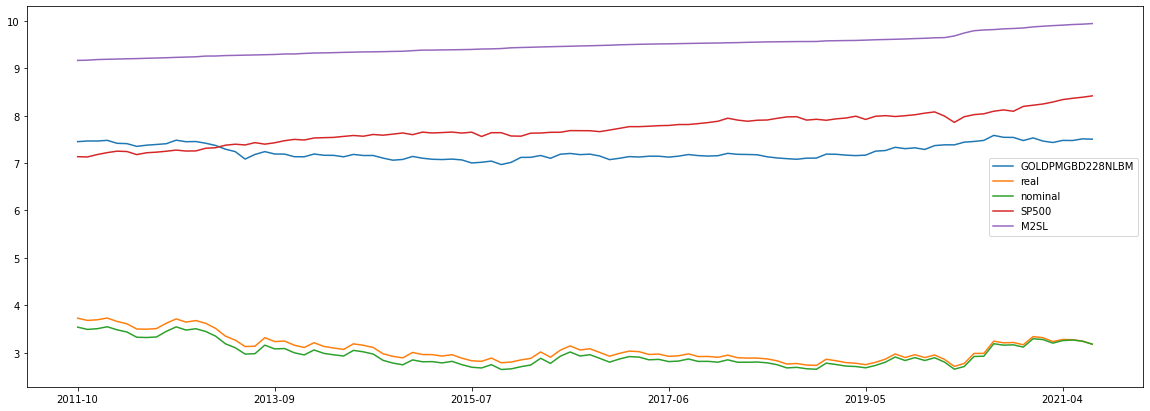

In [177]:
np.log(df8).plot(figsize=(20,7)) # добавить инфляцию

In [178]:
log_df8 = np.log(df8)
log_df8['GOLDPMGBD228NLBM'] = log_df8['GOLDPMGBD228NLBM']-4
log_df8['M2SL'] = log_df8['M2SL']-6
log_df8['SP500'] = log_df8['SP500']-4

<AxesSubplot:>

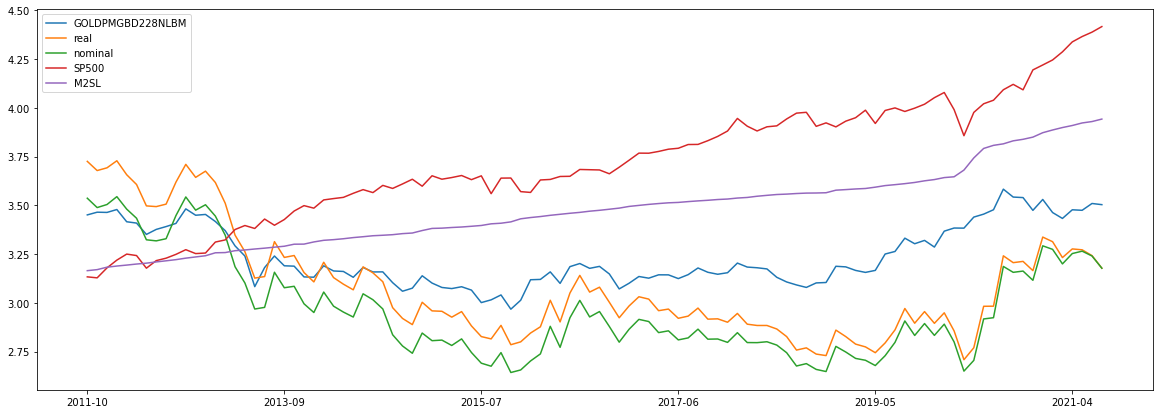

In [179]:
log_df8.plot(figsize=(20,7))

In [180]:
df9 = pd.DataFrame(df9)
df9['date'] = pd.to_datetime(df9['DATE'])
df9.set_index('date', inplace=True)
df9 = df9.drop('DATE', axis=1)
df9['CPIAUCSL'] = df9['CPIAUCSL'].astype(float)
df9.index = pd.to_datetime(df9.index).strftime('%Y-%m')

In [181]:
df9

,CPIAUCSL
date,
1947-01,21.480
1947-02,21.620
1947-03,22.000
1947-04,22.000
1947-05,21.950
...,...
2021-04,266.832
2021-05,268.551
2021-06,270.981


In [182]:
df8 = pd.concat([df1, df7, data, df2, df9],axis=1)
df8 = df8.dropna()
df8

,GOLDPMGBD228NLBM,real,nominal,SP500,M2SL,CPIAUCSL
2011-10,1722.00,41.50,34.355,1253.30,9559.5,226.750
2011-11,1746.00,39.59,32.746,1246.96,9610.1,227.169
2012-01,1744.00,40.15,33.265,1312.41,9731.5,227.842
2012-02,1770.00,41.63,34.633,1365.68,9789.3,228.329
2012-03,1662.50,38.75,32.485,1408.47,9837.1,228.807
...,...,...,...,...,...,...
2021-03,1691.05,25.34,24.532,3972.89,19913.5,264.793
2021-04,1767.65,26.49,25.869,4181.17,20122.7,266.832
2021-06,1763.15,26.37,26.188,4297.50,20387.4,270.981
2021-07,1825.75,25.60,25.547,4395.26,20534.3,272.265


In [185]:
log_df8 = np.log(df8)
log_df8['GOLDPMGBD228NLBM'] = log_df8['GOLDPMGBD228NLBM']-4
log_df8['M2SL'] = log_df8['M2SL']-6
log_df8['SP500'] = log_df8['SP500']-4
log_df8['CPIAUCSL'] = log_df8['CPIAUCSL']-2

<AxesSubplot:>

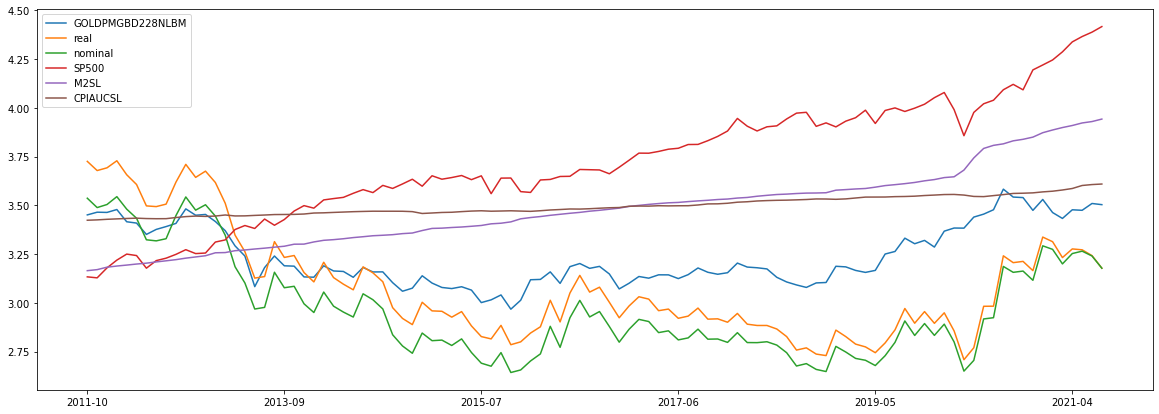

In [186]:
log_df8.plot(figsize=(20,7))

<AxesSubplot:>

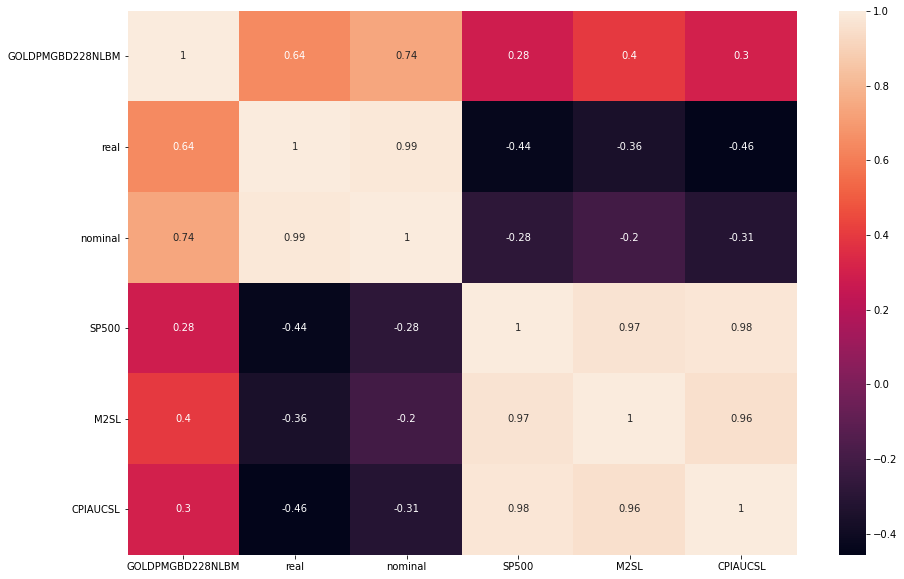

In [187]:
plt.figure(figsize=(15, 10))
sns.heatmap(df8.corr(), annot=True)